##Numpy

練習 1：softmax 函數

In [ ]:
import numpy as np

#practice1: softmax function

# 設定總共類別
c = 10
# 模擬輸出 logits
x = np.random.rand(c)
print('logits:')
print(x) #print logits

#todo
exp_x = np.exp(x)
softmax_x =  exp_x/exp_x.sum() #softmax formula

print('softmax result:')
print(softmax_x)



logits:
[0.42290661 0.93901792 0.06375052 0.33131251 0.00214685 0.65269275
 0.45358642 0.65186578 0.92126633 0.87863579]
softmax result:
[0.0853759  0.14304728 0.05961503 0.07790341 0.05605336 0.10743113
 0.08803581 0.10734233 0.14053036 0.13466538]


練習 2：Linear Layer + ReLU Activation

In [ ]:
import numpy as np

#practice2: Linear Layer + ReLU Activation
# 設定輸入維度
d_in = 10
# 設定輸出維度
d_out = 30

# 模擬神經網路輸入
x = np.ones((d_in, 1))
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5
print('模擬神經網路輸入:')
print(x)
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5
# todo
Wx_b = (W @ x) + b
result = np.maximum(0, Wx_b)
print('result:')
print(result)

模擬神經網路輸入:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
result:
[[ 5.75847162]
 [ 0.        ]
 [ 0.9418871 ]
 [ 0.        ]
 [24.71837937]
 [12.18722894]
 [ 3.95261779]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [15.34058028]
 [ 3.98029318]
 [11.95365832]
 [19.85377084]
 [13.4705563 ]
 [ 0.        ]
 [ 0.        ]
 [ 6.78722416]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 2.28924927]
 [ 0.87212684]
 [ 0.        ]
 [ 5.34886398]]


##Pandas

練習 1：數值轉換

In [ ]:
import numpy as np
import pandas as pd

#practice3: 數值轉換
#https://codis.cwa.gov.tw/StationData Tainan(467410) 2022.08
counter = [0,0,0,0,0]
def UV_level(x):
    if x >= 11:
        counter[4] += 1
        return '極高'
    elif x >= 8:
        counter[3] += 1
        return '甚高'
    elif x >= 6:
        counter[2] += 1
        return '高'
    elif x >= 3:
        counter[1] += 1
        return '中'
    else:
        counter[0] += 1
        return '低'

# 讀取資料
# 資料中第一列（row）為中文欄位名稱，第二列為英文欄位名稱
# 我們選擇使用英文欄位名稱進行操作
weather_data = pd.read_csv('./data/467410-2022-08.csv', skiprows=1,
                           usecols=["ObsTime","UVI Max"]) #skip one row(Chinese title)
#add new column
weather_data_UVlevel = weather_data.assign( UVI_Level=weather_data['UVI Max'].apply(UV_level))
print(weather_data_UVlevel)
#print the counter
print("極高: ",counter[4])
print("甚高: ",counter[3])
print("高: ",counter[2])
print("中: ",counter[1])
print("低: ",counter[0])


    ObsTime  UVI Max UVI_Level
0         1       11        極高
1         2        4         中
2         3       11        極高
3         4       11        極高
4         5       14        極高
5         6       12        極高
6         7        8        甚高
7         8       11        極高
8         9        7         高
9        10       13        極高
10       11       10        甚高
11       12       15        極高
12       13       14        極高
13       14       12        極高
14       15        8        甚高
15       16       11        極高
16       17       13        極高
17       18        7         高
18       19       14        極高
19       20       13        極高
20       21       13        極高
21       22       14        極高
22       23       13        極高
23       24        8        甚高
24       25       14        極高
25       26       13        極高
26       27       13        極高
27       28       12        極高
28       29       11        極高
29       30       13        極高
30       31       13        極高
極高:  24


練習 2：條件篩選

In [9]:
import numpy as np
import pandas as pd

#practice4: 條件篩選

# 讀取資料
# 資料中第一列（row）為中文欄位名稱，第二列為英文欄位名稱
# 我們選擇使用英文欄位名稱進行操作
weather_data_original = pd.read_csv('./data/467410-2022-08.csv', skiprows=1)
weather_data = pd.read_csv('./data/467410-2022-08.csv', skiprows=1)

#calculate intensity & mean
weather_data['Precp'] = weather_data['Precp'].replace("T",0).astype(float)
weather_data.loc[weather_data['PrecpHour'] == 0, 'Intensity'] = 0
weather_data.loc[weather_data['PrecpHour'] != 0, 'Intensity'] = weather_data['Precp'] / weather_data['PrecpHour']
precpAvg = weather_data['Intensity'].mean()
print('Intensity Avg: ',precpAvg)

#filter the data
filter = ((weather_data['Precp'] != 'T') & ((weather_data['Intensity'] > precpAvg)))
filtered_data = weather_data[filter]
#filtered_data = weather_data_original.loc[filter, ['Precp',"PrecpHour"]]
print(filtered_data)

Intensity Avg:  3.2059611226654647
    ObsTime  StnPres  SeaPres  StnPresMax       StnPresMaxTime  StnPresMin  \
1         2   1005.9   1009.0      1008.1  2022/08/02 10:34:00      1003.9   
6         7   1005.3   1008.4      1007.3  2022/08/07 23:00:00      1003.4   
8         9   1005.1   1008.2      1006.8  2022/08/09 22:13:00      1003.6   
9        10   1005.7   1008.8      1007.8  2022/08/10 21:25:00      1003.7   
14       15   1004.1   1007.2      1005.1  2022/08/15 21:49:00      1002.9   
15       16   1004.3   1007.4      1006.0  2022/08/16 22:42:00      1002.8   
16       17   1004.8   1007.9      1006.4  2022/08/17 21:48:00      1002.9   
17       18   1004.5   1007.6      1005.8  2022/08/18 22:53:00      1003.0   

         StnPresMinTime  Temperature  T Max           T Max Time  ...  \
1   2022/08/02 16:38:00         27.5   28.9  2022/08/02 00:01:00  ...   
6   2022/08/07 14:23:00         28.7   33.5  2022/08/07 11:55:00  ...   
8   2022/08/09 15:12:00         29.1   33.4

##Matplotlib

練習 1：折線圖

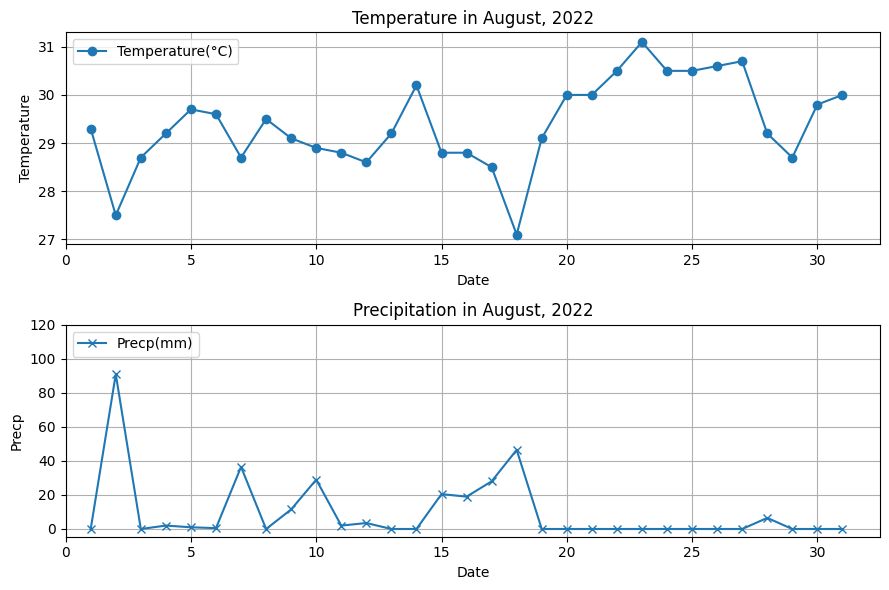

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#practice5: 折線圖
# 請依照日期畫出氣溫以及雨量的變化，並以折線圖的方式呈現。

weather_data = pd.read_csv('./data/467410-2022-08.csv', skiprows=1)
weather_data['Precp'] = weather_data['Precp'].replace("T",0).astype(float)
fig, ax = plt.subplots(2,1, figsize=(9,6))

# Plot Temperature
ax[0].plot(weather_data['ObsTime'],weather_data['Temperature'], marker='o')
ax[0].set_xlim(0,None)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Temperature')
ax[0].set_title('Temperature in August, 2022')
ax[0].legend(loc='upper left',labels=['Temperature(°C)'])
ax[0].grid(True)

# Plot Precp
ax[1].plot(weather_data['ObsTime'],weather_data['Precp'], marker='x')
ax[1].set_xlim(0,None)
ax[1].set_ylim(None,120)
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Precp')
ax[1].set_title('Precipitation in August, 2022')
ax[1].legend(loc='upper left',labels=['Precp(mm)'])
ax[1].grid(True)

plt.tight_layout()
plt.show()

練習 2：雷達圖

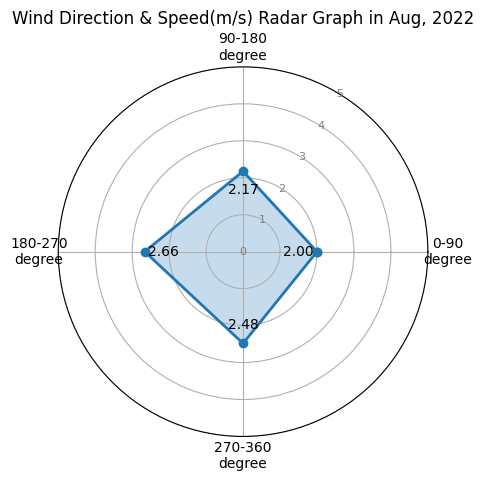

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#practice6: 雷達圖

# 分析風速和風向之間的關係，對於每個風向角度區間（0-90度、90-180度、180-270度、270-360度），計算相應的平均風速，並繪製成雷達圖以可視化四種風向的風速分佈情況。

weather_data = pd.read_csv('./data/467410-2022-08.csv', skiprows=1)

weather_data['WD'] = pd.cut(weather_data['WD'], bins=[0, 90, 180, 270, 360], labels=['0-90\ndegree', '90-180\ndegree', '180-270\ndegree', '270-360\ndegree'], right=False)

# Calculate average wind speed for each direction
speedAvg = weather_data.groupby('WD')['WS'].mean()



labels = speedAvg.index.tolist()
values = speedAvg.values.tolist()
ranges = [0,1,2,3,4,5]

# angle for each axis (the angle unit is "radian")
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# complete the radar "circle", "closing" the plot
values = np.concatenate((values,[values[0]]))
angles = np.concatenate((angles,[angles[0]]))

# Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_ylim(top=5)

# Add labels
ax.set_yticklabels([])
ax.set_thetagrids(np.array(angles[:-1]) * 180/np.pi, labels)
for range in ranges:
    x = 45
    y = range
    ax.text(x, y, range, ha='center', va='center', fontsize=8, color='gray')

# Add value
for angle, value in zip(angles, values[:-1]):
    x = angle
    y = value - 0.5
    ax.text(x, y, f'{value:.2f}', ha='center', va='center', fontsize=10, color='black')

ax.grid(True)
plt.title('Wind Direction & Speed(m/s) Radar Graph in Aug, 2022')
plt.show()

##Scikit-learn

練習 1：改善決策樹分類模型

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn

# 練習 Hint

# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split
#正規化
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('./data/train.csv')

all_attr = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
# check null data
#df.info()
#print(df.isna().sum())
# 取出訓練資料需要分析的資料欄位
df['Family'] = df['SibSp'] + df['Parch'] + 1
df['FamilyEncode'] = 0
df.loc[(df['Family'] == 3) | (df['Family'] == 4), 'FamilyEncode'] = 1
df.loc[(df['Family'] > 4), 'FamilyEncode'] = 2
df['Alone'] = 0
df.loc[df['Family'] == 1, 'Alone'] = 1
# df.loc[df['Pclass'] != 3, 'Pclass'] = 0
# df.loc[df['Pclass'] == 3, 'Pclass'] = 1

df_x = df[['Age', 'Fare','Sex','Pclass']] #有無ticket 皆可
# 取出訓練資料的答案
df_y = df['Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
#df_x['Ticket'] = df_x['Ticket'].str.extract('(\d+)', expand=False) #extract the number
#df_x['Ticket'] = df.duplicated('Ticket', keep=False).astype(int)
# concat = pd.concat([df['Ticket'],df_x['Ticket']], axis=1)
# print(concat)

imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
age = df_x['Age'].to_numpy().reshape(-1, 1)
#embarked = df_x['Embarked'].to_numpy().reshape(-1, 1)

fare_mean = df_x['Fare'].mean()
fare_std = df_x['Fare'].std()
df_x['Fare'] = (df_x['Fare']-fare_mean) / fare_std

# 根據資料學習需要填補的值 & 填補缺失值
imputer_median.fit(age)
#imputer_most_frequent.fit(embarked)

df_x['Age'] = imputer_median.transform(age)
#df_x['Embarked'] = imputer_most_frequent.transform(embarked)

age_mean = df_x['Age'].mean()
age_std = df_x['Age'].std()
df_x['Age'] = (df_x['Age']-age_mean) / age_std


# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
encode_targets = ['Sex']
for target in encode_targets:
    # 給予每個類別一個數值
    le.fit(df_x[target])
    # 轉換所有類別成為數值
    df_x[target] = le.transform(df_x[target])

#print(df_x.isnull().sum())
# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = DecisionTreeClassifier(
    random_state=1012,
    max_leaf_nodes=8, #8
    max_depth= 15,  #15
    #min_samples_split=25, #20
    criterion='gini'
    )

# 訓練決策樹模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

# save the model
#pickle.dump(model, open('./models/Titanic_DecisionTree.pickle', 'wb'))

train accuracy: 0.8314606741573034
test accuracy: 0.8156424581005587


<ipython-input-14-d5ed287c2dc3>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Fare'] = (df_x['Fare']-fare_mean) / fare_std
<ipython-input-14-d5ed287c2dc3>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer_median.transform(age)
<ipython-input-14-d5ed287c2dc3>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

練習 2：使用不同的模型

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn

# 練習 Hint

# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split
#正規化
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('./data/train.csv')

all_attr = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
# check null data
#df.info()
#print(df.isna().sum())
# 取出訓練資料需要分析的資料欄位
df['Family'] = df['SibSp'] + df['Parch'] + 1
df['FamilyEncode'] = 0
df.loc[(df['Family'] == 3) | (df['Family'] == 4), 'FamilyEncode'] = 1
df.loc[(df['Family'] > 4), 'FamilyEncode'] = 2
df['Alone'] = 0
df.loc[df['Family'] == 1, 'Alone'] = 1
# df.loc[df['Pclass'] != 3, 'Pclass'] = 0
# df.loc[df['Pclass'] == 3, 'Pclass'] = 1

df_x = df[['Age', 'Fare','Sex','Pclass']]
# 取出訓練資料的答案
df_y = df['Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
#df_x['Ticket'] = df_x['Ticket'].str.extract('(\d+)', expand=False) #extract the number
#df_x['Ticket'] = df.duplicated('Ticket', keep=False).astype(int)
# concat = pd.concat([df['Ticket'],df_x['Ticket']], axis=1)
# print(concat)

imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
age = df_x['Age'].to_numpy().reshape(-1, 1)
#embarked = df_x['Embarked'].to_numpy().reshape(-1, 1)

fare_mean = df_x['Fare'].mean()
fare_std = df_x['Fare'].std()
df_x['Fare'] = (df_x['Fare']-fare_mean) / fare_std

# 根據資料學習需要填補的值 & 填補缺失值
imputer_median.fit(age)
#imputer_most_frequent.fit(embarked)

df_x['Age'] = imputer_median.transform(age)
#df_x['Embarked'] = imputer_most_frequent.transform(embarked)

age_mean = df_x['Age'].mean()
age_std = df_x['Age'].std()
df_x['Age'] = (df_x['Age']-age_mean) / age_std

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
encode_targets = ['Sex']
for target in encode_targets:
    # 給予每個類別一個數值
    le.fit(df_x[target])
    # 轉換所有類別成為數值
    df_x[target] = le.transform(df_x[target])

#print(df_x.isnull().sum())
# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 1. Random Forest
Randomforest = RandomForestClassifier(
    random_state=1012,
    n_estimators = 28, #28
    criterion = 'gini',
    #min_samples_leaf=1,
    min_samples_split=2,
    #max_leaf_nodes=26,
    max_depth=6,#6
    )
Randomforest.fit(train_x, train_y)

# 2. K Neighbors
KNeighbor =KNeighborsClassifier(n_neighbors=7) #7
KNeighbor.fit(train_x,train_y)

# 3. Logistic Regression
logic = LogisticRegression(random_state = 1012, max_iter=30) #30
logic.fit(train_x,train_y)

# 4. GaussianNB
gNB = GaussianNB()
gNB.fit(train_x,train_y)

# 5. SVC
svc = SVC(kernel='linear',random_state=1012)
svc.fit(train_x,train_y)

# 計算準確度
pred_train_RF = Randomforest.predict(train_x)
train_acc_RF = accuracy_score(train_y, pred_train_RF)
pred_test_RF = Randomforest.predict(test_x)
test_acc_RF = accuracy_score(test_y, pred_test_RF)

pred_train_KN = KNeighbor.predict(train_x)
train_acc_KN = accuracy_score(train_y, pred_train_KN)
pred_test_KN = KNeighbor.predict(test_x)
test_acc_KN = accuracy_score(test_y, pred_test_KN)

pred_train_LO = logic.predict(train_x)
train_acc_LO = accuracy_score(train_y, pred_train_LO)
pred_test_LO = logic.predict(test_x)
test_acc_LO = accuracy_score(test_y, pred_test_LO)

pred_train_G = gNB.predict(train_x)
train_acc_G = accuracy_score(train_y, pred_train_G)
pred_test_G = gNB.predict(test_x)
test_acc_G = accuracy_score(test_y, pred_test_G)

pred_train_SVC = gNB.predict(train_x)
train_acc_SVC = accuracy_score(train_y, pred_train_SVC)
pred_test_SVC = gNB.predict(test_x)
test_acc_SVC = accuracy_score(test_y, pred_test_SVC)

# 輸出準確度
print('(1) Random Forest Classifier')
print('train accuracy: {}'.format(train_acc_RF))
print('test accuracy: {}'.format(test_acc_RF))
print('(2) K Neighbors Classifier')
print('train accuracy: {}'.format(train_acc_KN))
print('test accuracy: {}'.format(test_acc_KN))
print('(3) Logistic Regression')
print('train accuracy: {}'.format(train_acc_LO))
print('test accuracy: {}'.format(test_acc_LO))
print('(4) Gaussian NB')
print('train accuracy: {}'.format(train_acc_G))
print('test accuracy: {}'.format(test_acc_G))
print('(5) SVC')
print('train accuracy: {}'.format(train_acc_SVC))
print('test accuracy: {}'.format(test_acc_SVC))

# save the model
#pickle.dump(Randomforest, open('./models/Titanic_RandomForest.pickle', 'wb'))

<ipython-input-15-488b20833128>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Fare'] = (df_x['Fare']-fare_mean) / fare_std
<ipython-input-15-488b20833128>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer_median.transform(age)
<ipython-input-15-488b20833128>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

(1) Random Forest Classifier
train accuracy: 0.8946629213483146
test accuracy: 0.8212290502793296
(2) K Neighbors Classifier
train accuracy: 0.8567415730337079
test accuracy: 0.8156424581005587
(3) Logistic Regression
train accuracy: 0.797752808988764
test accuracy: 0.7430167597765364
(4) Gaussian NB
train accuracy: 0.7780898876404494
test accuracy: 0.7653631284916201
(5) SVC
train accuracy: 0.7780898876404494
test accuracy: 0.7653631284916201
